https://www.kaggle.com/datasets/camnugent/california-housing-prices/code

# Import Library

In [2]:
from google.colab import files
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# Data preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Modelling
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

# Sambungkan ke kaggle dan download dataset

In [3]:
! pip install -q kaggle
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
! kaggle datasets download -d camnugent/california-housing-prices -p /content/ --unzip

  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 112MB/s]


# Load data

In [5]:
housing = pd.read_csv('/content/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Exploratory Data Analysis (Data Understanding)

In [6]:
housing.shape

(20640, 10)

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Missing value




In [9]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

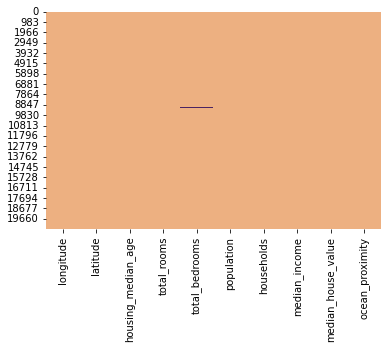

In [10]:
sns.heatmap(housing.isnull(), cbar = False, cmap='flare')

Ganti nilai na pada kolom "total_bedrooms" dengan mediannya




In [11]:
print('Median fitur "total_bedrooms":', housing['total_bedrooms'].median())

Median fitur "total_bedrooms": 435.0


In [12]:
housing['total_bedrooms'].fillna(value=housing['total_bedrooms'].median(), inplace=True)

In [13]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Outliers


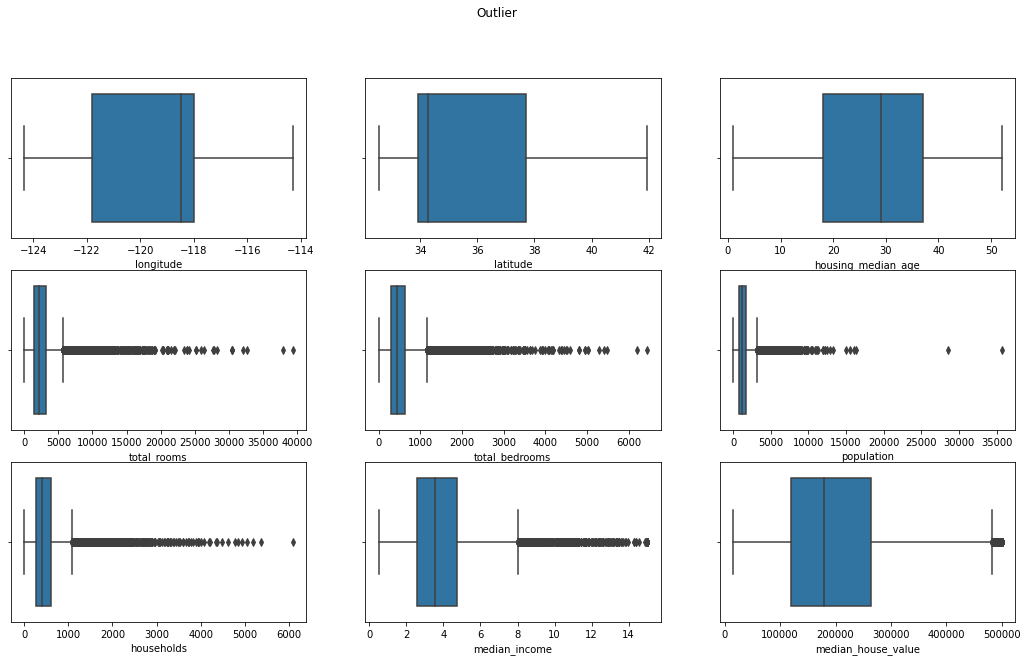

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
fig.suptitle('Outlier')
#  longitude	latitude	housing_median_age	total_rooms	total_bedrooms	population	households	median_income median_house_value
sns.boxplot(ax=axes[0, 0], x=housing['longitude'])
sns.boxplot(ax=axes[0, 1], x=housing['latitude'])
sns.boxplot(ax=axes[0, 2], x=housing['housing_median_age'])
sns.boxplot(ax=axes[1, 0], x=housing['total_rooms'])
sns.boxplot(ax=axes[1, 1], x=housing['total_bedrooms'])
sns.boxplot(ax=axes[1, 2], x=housing['population'])
sns.boxplot(ax=axes[2, 0], x=housing['households'])
sns.boxplot(ax=axes[2, 1], x=housing['median_income'])
sns.boxplot(ax=axes[2, 2], x=housing['median_house_value'])

## Univariate Analysis

In [15]:
# Pembagian categorical dan numerical features
categorical_features = [x for x in housing.columns if housing[x].dtypes == 'object']
numerical_features = [x for x in housing.columns if x not in categorical_features]
print('Categorical :', categorical_features)
print('Numerical   :', numerical_features)

Categorical : ['ocean_proximity']
Numerical   : ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


### Categorical Features

#### Fitur ocean_proximity

            jumlah sampel  persentase
<1H OCEAN            9136        44.3
INLAND               6551        31.7
NEAR OCEAN           2658        12.9
NEAR BAY             2290        11.1
ISLAND                  5         0.0


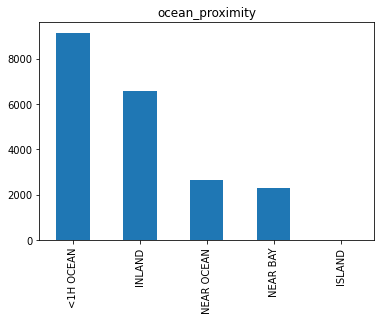

In [16]:
feature = categorical_features[0]
count = housing[feature].value_counts()
percent = 100*housing[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

### Numerical Features

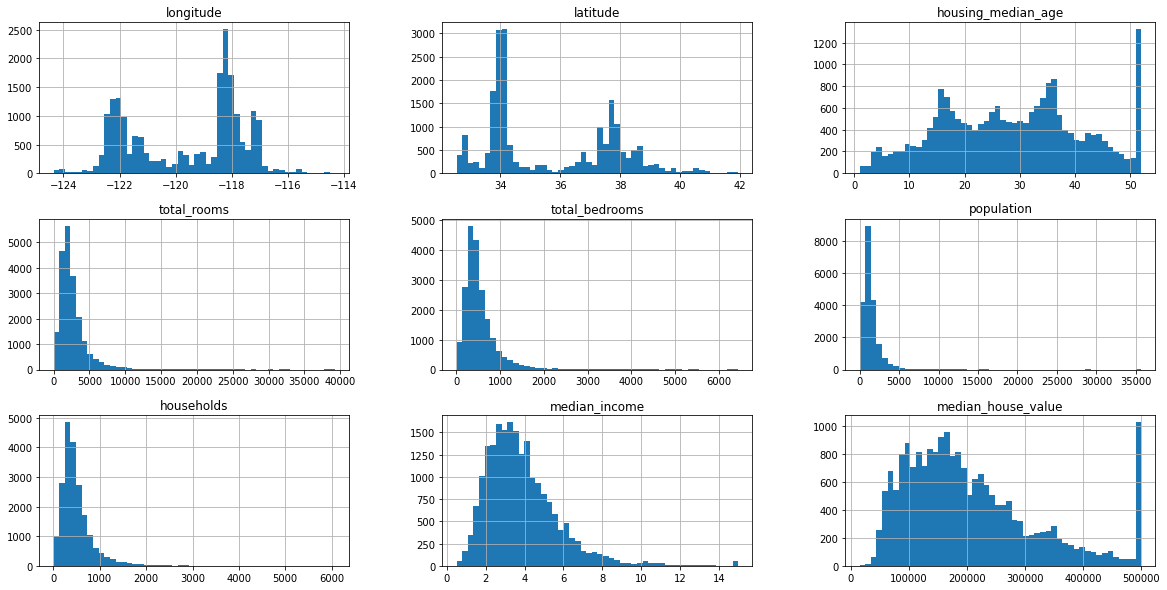

In [17]:
housing.hist(bins=50, figsize=(20,10))
plt.show()

## Multivariate Analysis

### Categorical Features

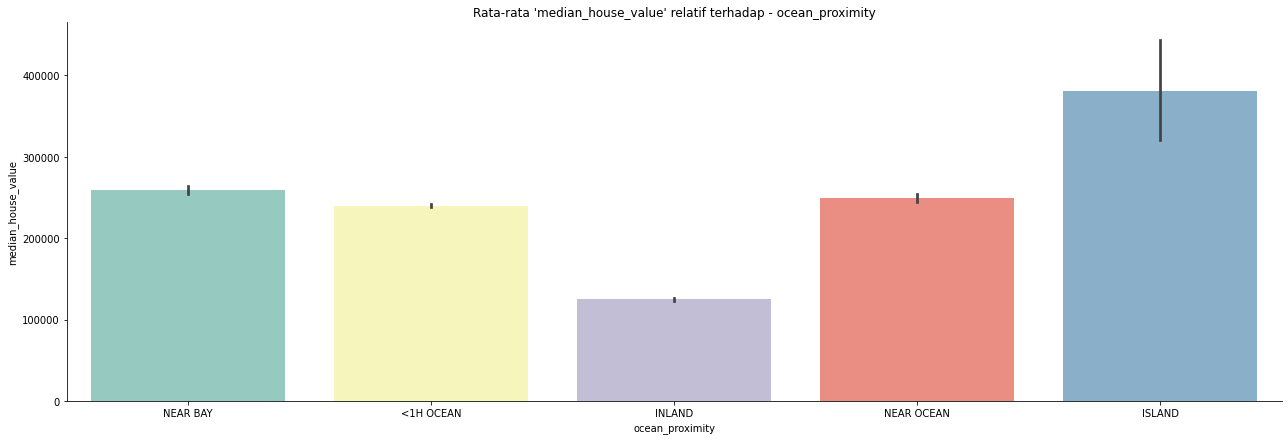

In [18]:
for col in categorical_features:
  sns.catplot(x=col, y='median_house_value', kind="bar", dodge=False, height = 6, aspect=3, data=housing, palette="Set3")
  plt.title("Rata-rata 'median_house_value' relatif terhadap - {}".format(col))

### Numerical Features

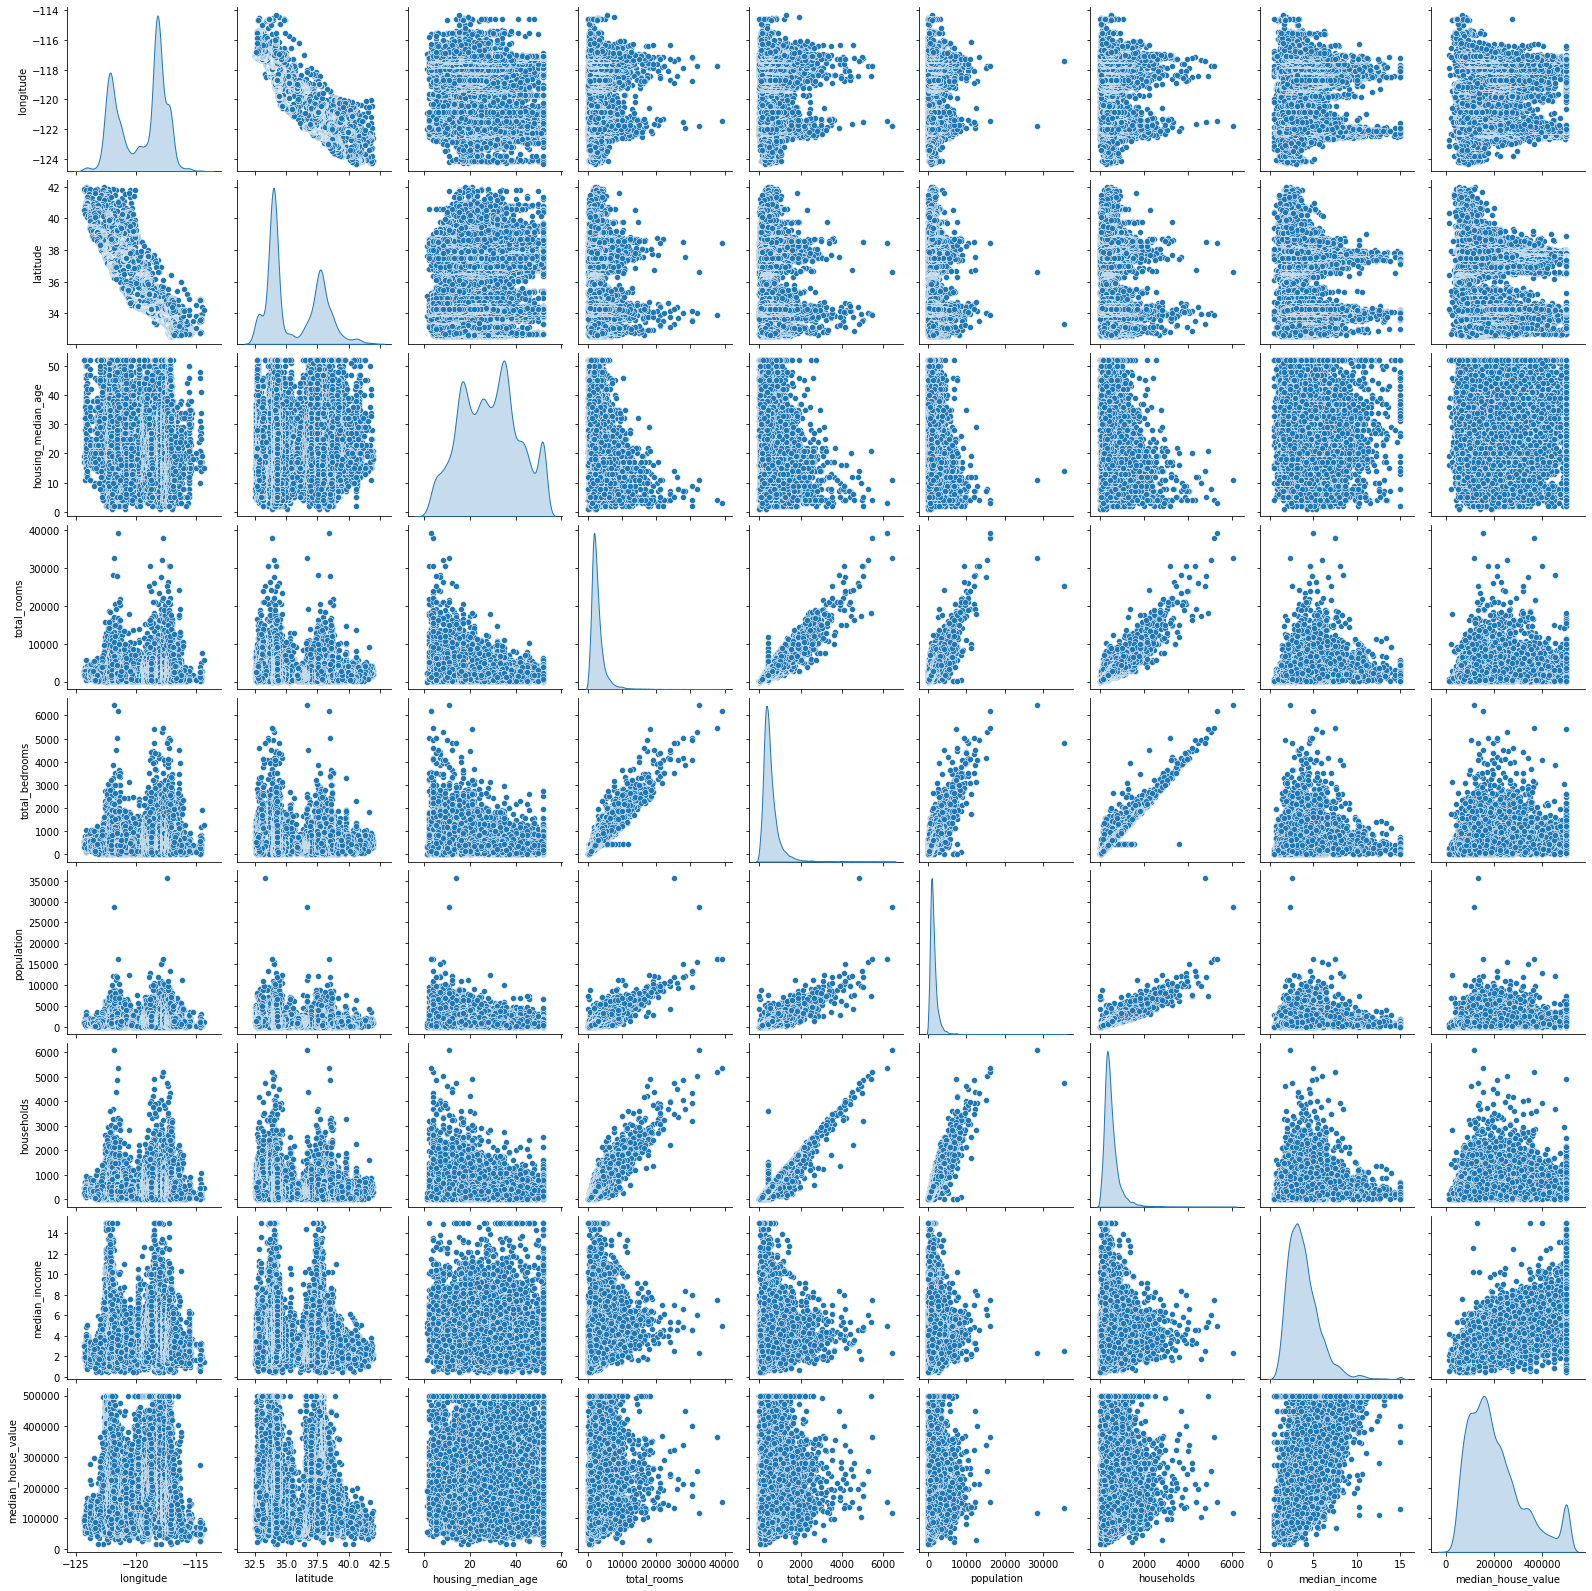

In [19]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(housing, diag_kind = 'kde')

Evaluasi skor korelasi fitur

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

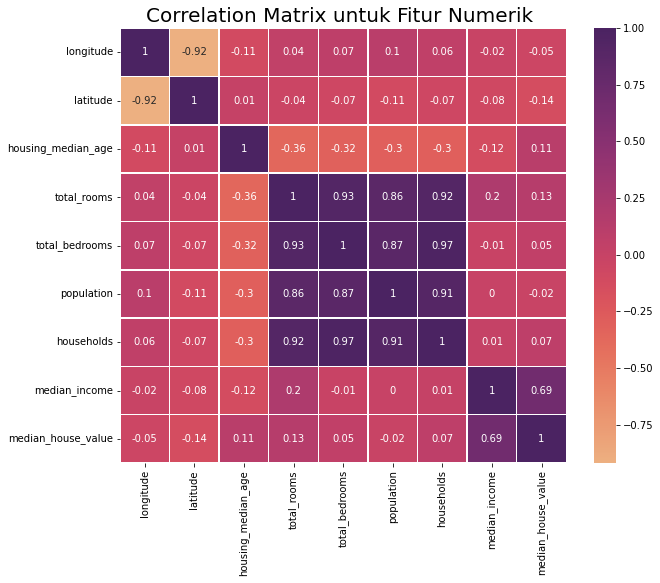

In [20]:
plt.figure(figsize=(10, 8))
correlation_matrix = housing.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='flare', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## Kesimpulan EDA  
- Terdapat outlier di banyak fitur yang perlu dihilangkan
- Terdapat korelasi yang cukup tinggi antara median_house_value (target) dengan median_income
- Rumah paling banyak terletak pada <1H OCEAN
- Terdapat korelasi yang tinggi antara total_room, total_beedroom, population, dan households

# Data Preparation

## Menghilangkan Outlier

In [21]:
# Hilangkan Outliers
Q1 = housing.quantile(0.25)
Q3 = housing.quantile(0.75)
IQR=Q3-Q1
housing=housing[~((housing<(Q1-1.5*IQR))|(housing>(Q3+1.5*IQR))).any(axis=1)]
housing.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


(17609, 10)

## Encoding fitur kategori

In [22]:
housing = pd.concat([housing, pd.get_dummies(housing['ocean_proximity'], prefix='ocean_prox')],axis=1)
housing.drop(['ocean_proximity'], axis=1, inplace=True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_prox_<1H OCEAN,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR BAY,ocean_prox_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0


## Reduction dimensions
 

Jika dicek menggunakan fungsi pairplot, kedua fitur letak rumah dalam kolom longitude dan latitude memiliki korelasi yang tinggi. Hal ini karena kedua fitur ini memiliki informasi yang sama, yaitu letak/koordinat rumah. 

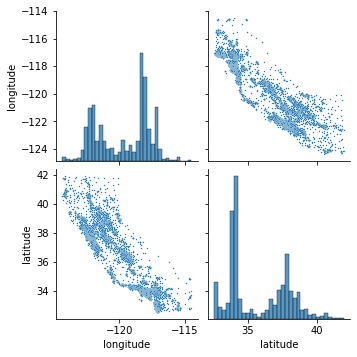

In [23]:
sns.pairplot(housing[['longitude','latitude']], plot_kws={"s": 2});

In [24]:
# aplikasikan PCA
pca = PCA(n_components=2, random_state=42)
pca.fit(housing[['longitude','latitude']])
princ_comp = pca.transform(housing[['longitude','latitude']])

In [25]:
pca.explained_variance_ratio_.round(3)

array([0.962, 0.038])

In [26]:
pca = PCA(n_components=1, random_state=42)
pca.fit(housing[['longitude','latitude']])
housing['coordinate'] = pca.transform(housing.loc[:, ('longitude','latitude')]).flatten()
housing.drop(['longitude','latitude'], axis=1, inplace=True)

In [27]:
housing.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_prox_<1H OCEAN,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR BAY,ocean_prox_NEAR OCEAN,coordinate
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,3.369297
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,3.376065
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,3.376065
5,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0,3.376065
6,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0,3.368704


## Train test split

In [28]:
X = housing.drop(["median_house_value"],axis =1)
y = housing["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_test)}')

Total # of sample in whole dataset: 17609
Total # of sample in train dataset: 14087
Total # of sample in validation dataset: 3522


## Standarisasi

In [30]:
# housing_median_age	total_rooms	total_bedrooms	population	households	median_income coordinate
numerical_features = ['housing_median_age',
                      'total_rooms',
                      'total_bedrooms', 
                      'population',
                      'households',
                      'median_income',
                      'coordinate']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,coordinate
4551,-1.354176,-0.405492,1.147354,1.030596,1.227943,-1.906973,-0.744536
11088,-0.698202,-0.508199,-0.671907,-0.489297,-0.584124,0.914239,-0.884597
13609,0.531747,1.512930,1.051603,0.896633,0.818767,0.365110,-0.948057
11474,-1.026189,-0.499946,0.057621,0.997519,0.073481,-0.547210,-0.889182
10660,-1.108186,0.363894,0.240003,-0.294143,0.375492,0.295653,-0.946214


In [31]:
X_train[numerical_features].describe().round(4)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,coordinate
count,14087.0000,14087.0000,14087.0000,14087.0000,14087.0000,14087.0000,14087.0000
mean,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-2.3381,-1.9654,-2.0215,-1.9794,-2.0211,-2.1354,-1.9230
25%,-0.8622,-0.7067,-0.7175,-0.7175,-0.7156,-0.7528,-0.8178
50%,0.0398,-0.1469,-0.1339,-0.1453,-0.1360,-0.1260,-0.5550
75%,0.6957,0.5776,0.5956,0.6022,0.6069,0.6307,1.0572
max,1.8437,3.2544,3.2630,3.1938,3.2836,3.0811,2.6471


# Model Development

In [32]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mae', 'test_mae'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

## KNN

In [33]:
# Gunakan gridsearch untuk mencari hasil terbaik
neighbors = list(range(1,15))
parameters = {
    'n_neighbors':neighbors
}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, parameters, verbose=2)
grid_search.fit(X_train, y_train)
print("KNN GridSearch score: "+str(grid_search.best_score_))
print("KNN GridSearch params: "+str(grid_search.best_params_))

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n

In [34]:
# buat model prediksi
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

## Random Forest

In [35]:
# Gunakan gridsearch untuk mencari hasil terbaik
n_estimators = list(range(40,101,20))
max_depth = list(range(10,20,2))

parameters = {
    'n_estimators':n_estimators,
    'max_depth':max_depth
}
RF = RandomForestRegressor()
grid_search = GridSearchCV(RF, parameters, verbose=2)
grid_search.fit(X_train, y_train)
print("RF GridSearch score: "+str(grid_search.best_score_))
print("RF GridSearch params: "+str(grid_search.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ......................max_depth=10, n_estimators=40; total time=   2.3s
[CV] END ......................max_depth=10, n_estimators=40; total time=   2.7s
[CV] END ......................max_depth=10, n_estimators=40; total time=   3.0s
[CV] END ......................max_depth=10, n_estimators=40; total time=   3.1s
[CV] END ......................max_depth=10, n_estimators=40; total time=   3.2s
[CV] END ......................max_depth=10, n_estimators=60; total time=   6.4s
[CV] END ......................max_depth=10, n_estimators=60; total time=   2.4s
[CV] END ......................max_depth=10, n_estimators=60; total time=   2.4s
[CV] END ......................max_depth=10, n_estimators=60; total time=   2.5s
[CV] END ......................max_depth=10, n_estimators=60; total time=   2.5s
[CV] END ......................max_depth=10, n_estimators=80; total time=   3.3s
[CV] END ......................max_depth=10, n_

In [36]:
# buat model prediksi
RF = RandomForestRegressor(n_estimators=100, max_depth=18, random_state=42, n_jobs=-1)
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=18, n_jobs=-1, random_state=42)

## Boosting Algorithm

In [37]:
# Gunakan gridsearch untuk mencari hasil terbaik
parameters = {
    'learning_rate':[0.1,0.3,0.5,0.05,0.005]
}
boosting = AdaBoostRegressor()
grid_search = GridSearchCV(boosting, parameters, verbose=2)
grid_search.fit(X_train, y_train)
print("Boosting GridSearch score: "+str(grid_search.best_score_))
print("Boosting GridSearch params: "+str(grid_search.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..................................learning_rate=0.1; total time=   1.2s
[CV] END ..................................learning_rate=0.1; total time=   1.2s
[CV] END ..................................learning_rate=0.1; total time=   1.2s
[CV] END ..................................learning_rate=0.1; total time=   1.2s
[CV] END ..................................learning_rate=0.1; total time=   1.2s
[CV] END ..................................learning_rate=0.3; total time=   1.1s
[CV] END ..................................learning_rate=0.3; total time=   1.1s
[CV] END ..................................learning_rate=0.3; total time=   1.0s
[CV] END ..................................learning_rate=0.3; total time=   0.9s
[CV] END ..................................learning_rate=0.3; total time=   1.1s
[CV] END ..................................learning_rate=0.5; total time=   1.0s
[CV] END ..................................learni

In [38]:
# buat model prediksi
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=42)                             
boosting.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.05, random_state=42)

# Evaluasi Model

In [39]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [40]:
# Buat variabel mae yang isinya adalah dataframe nilai mae data train dan test pada masing-masing algoritma
mae = pd.DataFrame(columns=['mae_train', 'mae_test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mae.loc[name, 'mae_train'] = mean_absolute_error(y_true=y_train, y_pred=model.predict(X_train)) 
    mae.loc[name, 'mae_test'] = mean_absolute_error(y_true=y_test, y_pred=model.predict(X_test))

In [41]:
mae

,mae_train,mae_test
KNN,34077.380931,38032.507924
RF,13907.016915,33080.75042
Boosting,48981.361864,50111.97536


In [42]:
mae_scale = abs(housing['median_house_value'].max()-housing['median_house_value'].min())*0.1
mae_scale

46720.100000000006

Tampak bahwa mae dari model KNN dan RF sudah di bawah 10% MAE yang telah di-scale berdasarkan data. Hal ini berarti model KNN dan RF sudah bagus, tetapi masih overfitting terhadap data training karena nilai MAE test masih lebih tinggi.

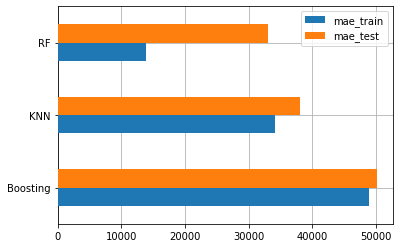

In [43]:
fig, ax = plt.subplots()
mae.sort_values(by='mae_test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [44]:
prediksi = X_test.iloc[:].copy()
pred_dict = {'y_true':y_test[:]}
for name, model_pred in model_dict.items():
    pred_dict['prediksi_'+name] = model_pred.predict(prediksi).round(1)
 
pred = pd.DataFrame(pred_dict)

In [45]:
pred.head()

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
3299,58800.0,82909.1,81113.8,89313.8
113,224100.0,306236.4,254725.9,215255.4
11323,187500.0,228645.5,201581.6,248700.5
2140,70400.0,69818.2,73133.5,102173.6
11836,148000.0,119963.6,122320.6,114456.2


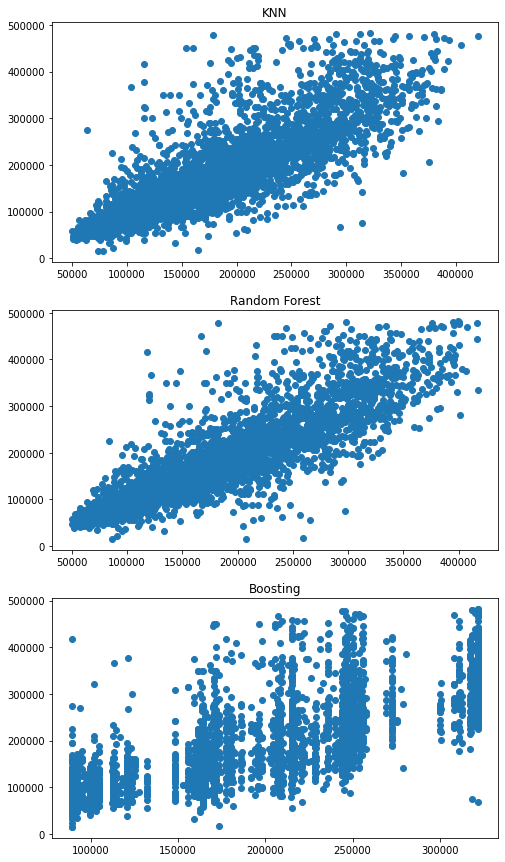

In [46]:
plt.figure(figsize=(8,15))
plt.subplot(311)
plt.title('KNN')
plt.scatter(pred['prediksi_KNN'], pred['y_true'])

plt.subplot(312)
plt.title('Random Forest')
plt.scatter(pred['prediksi_RF'], pred['y_true'])

plt.subplot(313)
plt.title('Boosting')
plt.scatter(pred['prediksi_Boosting'], pred['y_true'])
plt.show()